# <center><font color="red">Pesta Data Nasional (PeDaS) 2025 - Day 03</font> <br> <font color="blue">Multivariate & Multiple Time Series Forecasting + Data Babak Penyisihan PeDaS 2025</font></center>
<center><img alt="" src="images/logo-pedas.jpg" style="height: 150px;"/></center> 
<center><img alt="" src="images/head-pedas-2025.jpg"/></center> 

### <center><font color="green">Copyright ~ Taufik Sutanto 2025</font></center>

# <center><font color="blue">Outline Workshop PeDaS 2025 Hari Ketiga</font></center>

* **Pendahuluan** Berbagai tipe Series di Darts
* **Persiapan Data** Multivariate dan Multiple Time Series di Darts
* **Multivariate** Time Series **Models**
* **Optimasi** Model multivariate TS
* **Multiple** TimeSeries **Models**
* **Tanya-Jawab** Materi
* **Sosialisasi Kick-Off Babak Penyisihan PeDaS 2025 + Distribusi Dataset**
* **Tanya-Jawab Pelaksanaan Babak Penyisihan**

In [1]:
import warnings; warnings.simplefilter('ignore')
try:
    import google.colab
    IN_COLAB = True
    !mkdir data models images
    !wget -P data/ https://raw.githubusercontent.com/taudataanalytics/Pedas-2025/master/data/day.csv
    !wget -P data/ https://raw.githubusercontent.com/taudataanalytics/Pedas-2025/master/data/Tech_stocks.csv
    !pip install darts nolds tsfresh seaborn prophet plotly ipywidgets --q
except:
    IN_COLAB = False
    print("Running the code locally, please make sure all the python module versions agree with colab environment and all data/assets downloaded")

Running the code locally, please make sure all the python module versions agree with colab environment and all data/assets downloaded


In [2]:
import darts, numpy as np, pandas as pd, seaborn as sns
import matplotlib, matplotlib.pyplot as plt
from darts.metrics import smape, mape

seed = 42
np.random.seed(seed)
"Done"

'Done'

# <center>Univariate VS Multivariate VS Multiple Time Series</center>

* https://unit8co.github.io/darts/userguide/timeseries.html#multivariate-time-series-vs-multiple-time-series

## Beberapa Konsep Deret di Time Series (Darts)

* **Deret Waktu Univariat (Univariate Time Series)**: Ini adalah bentuk deret waktu yang paling sederhana, di mana hanya ada satu variabel yang diamati dari waktu ke waktu. Sebagai contoh, data suhu harian di satu lokasi.
* **Deret Waktu Kovariat (Covariate Time Series)**: Ini adalah deret waktu tambahan yang dapat membantu dalam peramalan deret waktu target. Ada dua jenis kovariat:
    * Kovariat Masa Lalu (Past Covariates): Nilainya diketahui pada saat prediksi.
    * Kovariat Masa Depan (Future Covariates): Nilainya sudah diketahui di masa depan untuk rentang waktu peramalan, seperti hari libur atau ramalan cuaca.

<center><img alt="" src="images/kovariat.jpg" style="height: 250px;"/></center> 

# <center><font color="blue">Penjelasan Darts - Multivariate Timeseries</font></center>

## **Multivariate series** adalah deret waktu yang punya **lebih dari satu dimensi** (artinya, ada banyak nilai pada setiap titik waktu).  

Kadang, dimensi-dimensi ini disebut **komponen**.  
Satu objek `TimeSeries` bisa:
- **Univariate** → kalau hanya punya satu komponen.  
- **Multivariate** → kalau punya beberapa komponen.

Pada multivariate series, semua komponen **berbagi sumbu waktu yang sama**, artinya semua nilai punya timestamp yang sama.


Beberapa model di **Darts** (dan hampir semua model machine learning) bisa bekerja dengan multivariate series.  
Itu berarti:
- Model bisa menerima multivariate series sebagai input (baik sebagai target maupun sebagai covariate).  
- Hasil ramalan (forecast) yang keluar akan punya jumlah dimensi yang sama dengan targetnya.

<center><img alt="" src="images/multivariate.png" style="height: 400px;"/></center> 

**Deret Waktu Multivariat (Multivariate Time Series)**:

* Deret waktu ini melibatkan beberapa variabel yang diukur secara bersamaan dari waktu ke waktu. Semua variabel ini berbagi sumbu waktu yang sama. Contohnya adalah data tekanan darah dan detak jantung seorang pasien yang diukur setiap jam. Dalam kasus ini, ada dua dimensi (tekanan darah dan detak jantung) yang diukur pada setiap langkah waktu. Ini disimpan dalam satu objek `TimeSeries` dengan dua kolom.
 * Sebuah **TimeSeries** yang memiliki *multiple components* (dimensi) pada setiap titik waktu.
 * Cocok ketika variabel-variabel dianggap *berkorelasi pada setiap waktu*, dan Anda ingin model mempelajari hubungan mereka secara bersamaan.  
 * Model Darts yang mendukung multivariate dapat menerima input dan menghasilkan forecast dalam bentuk vektor.  

# <center><font color="blue">Penjelasan Darts - Multiple Timeseries</font></center>

Selain itu, ada juga model yang bisa bekerja dengan **multiple time series** (lebih dari satu objek `TimeSeries` sekaligus).  
Artinya:
- Model bisa dilatih dengan banyak `TimeSeries`,  
- dan bisa dipakai untuk meramal banyak `TimeSeries` sekaligus.  

Kondisi ini sering disebut juga dengan **panel data**.  
Dalam kasus ini:
- Setiap `TimeSeries` **tidak wajib** punya index waktu yang sama (misalnya ada yang mulai tahun 1990, ada yang mulai tahun 2000).  
- Bahkan frekuensi datanya juga tidak harus sama.  

Model yang bisa menangani multiple series biasanya mengharapkan input berupa **sekumpulan `TimeSeries`**, misalnya dalam bentuk **list of TimeSeries** di Python.

<center><img alt="" src="images/multiple-ts.png" style="height: 400px;"/></center> 

**Deret Waktu Jamak (Multiple Time Series)**:

 * Ini merujuk pada beberapa deret waktu yang terpisah, yang dapat berupa univariat atau multivariat. Deret waktu ini tidak harus memiliki rentang waktu yang sama. Contohnya adalah data penjualan untuk beberapa produk yang berbeda, di mana setiap produk memiliki deret waktu penjualannya sendiri.
 * Contoh: catatan tekanan darah dan denyut jantung untuk beberapa pasien sebagai seri terpisah.
 * Masing-masing time series bisa memiliki indeks waktu dan frekuensi yang berbeda.  
 * Gunakan ketika Anda memiliki banyak entitas (user, lokasi, produk, dll.), dan ingin memanfaatkan pola umum melalui *global models*. 

<center><img alt="" src="images/series-in-darts.jpg" style="height: 400px;"/></center> 

### Skenario Penggunaan:

| Tipe Data                | Representasi            | Cocok untuk...                                      |
|--------------------------|--------------------------|-----------------------------------------------------|
| **Multivariate Series**  | Satu `TimeSeries` multikomponen | Variabel berkorelasi dalam satu entitas             |
| **Multiple Series**      | Banyak `TimeSeries` (list)     | Banyak objek/peristiwa independen                    |

- Gunakan **multivariate series** bila variabel yang saling terkait berada dalam satu entitas.
- Gunakan **multiple series** bila Anda memiliki banyak entitas, dan ingin melatih model yang belajar dari berbagai seri secara global.

Menggunakan **multivariate series** membantu model menangkap hubungan antar komponen secara bersamaan, sedangkan **multiple series** memberi model banyak contoh observasi. Pilihan mana yang tepat sangat bergantung pada masalah, dan kadang hanya bisa ditentukan lewat eksperimen.  

* Jika ada beberapa komponen yang saling berkorelasi dan berubah bersama sepanjang waktu (misalnya koordinat benda bergerak atau beberapa pengukuran dari satu objek), lebih alami digabung dalam **satu multivariate series**.  
* Sebaliknya, jika datanya berasal dari beberapa eksperimen atau pengamatan berbeda, sebaiknya dibuat sebagai **multiple series**.  
Selain itu, bila rentang waktunya tidak sama, sebaiknya juga dipisahkan sebagai series yang berbeda.

# Contoh implementasi Multivariate Time Series di Darts

* https://unit8co.github.io/darts/userguide/forecasting_overview.html#support-for-multivariate-series
* Data yang akan kita gunakan https://archive.ics.uci.edu/dataset/275/bike%2Bsharing%2Bdataset

## Permasalahan Multivariate Time Series: Bike Sharing Dataset (day.csv)
**Deskripsi Data**  
Dataset *Bike Sharing* (day.csv) berisi data jumlah peminjaman sepeda harian di Washington D.C. sepanjang 2011–2012.  
Selain jumlah sepeda yang dipinjam (`cnt`), dataset juga menyertakan beberapa variabel yang memengaruhi perilaku peminjaman:

- `temp` : Suhu normalisasi (0–1)
- `hum` : Kelembaban normalisasi (0–1)
- `windspeed` : Kecepatan angin normalisasi (0–1)
- `cnt` : Jumlah sepeda dipinjam (total)

**Mengapa Termasuk *Multivariate Time Series***  
- Variabel target `cnt` (jumlah peminjaman) **bervariasi terhadap waktu (harian)**.  
- Nilai `cnt` dipengaruhi secara bersamaan oleh **beberapa komponen (suhu, kelembaban, kecepatan angin)**.  
- Ketiga variabel ini saling berhubungan dan bersama-sama membentuk dinamika data seiring waktu.

**Contoh Permasalahan**  
> Bagaimana memprediksi jumlah sepeda yang akan dipinjam (`cnt`) di hari berikutnya dengan mempertimbangkan suhu, kelembaban, dan kecepatan angin pada hari tersebut?

**Intuisi Sederhana untuk Pemula**  
- Saat suhu nyaman → peminjaman cenderung naik.  
- Saat kelembaban tinggi atau angin kencang → peminjaman cenderung turun.  
- Kombinasi faktor cuaca inilah yang membuat data perlu dianalisis sebagai *multivariate time series*, bukan sekadar univariate.

<center><img alt="" src="images/bike-sharing.jpg" style="height: 250px;"/></center> 

# 1. Import Module Python yang dibutuhkan

In [3]:
import pandas as pd
from darts import TimeSeries
from darts.models import RNNModel
from darts.dataprocessing.transformers import Scaler
from darts.metrics import mape, smape
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
"Done"

'Done'

## Penjelasan:
* pandas → untuk membaca file csv.
* darts.TimeSeries → struktur utama untuk data time series di Darts.
* RNNModel → digunakan untuk membuat LSTM/GRU/RNN di Darts.
* Scaler → untuk normalisasi data (penting pada LSTM).
* mape → metrik error (Mean Absolute Percentage Error). Bisa diganti sMape.
* train_test_split → membagi data train dan test.
* matplotlib → untuk visualisasi.

In [4]:
# 2. Load dataset Bike Sharing
df = pd.read_csv("data/day.csv")
# Tampilkan beberapa baris awal
df.head(15)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
5,6,2011-01-06,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,1518,1606
6,7,2011-01-07,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510
7,8,2011-01-08,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,68,891,959
8,9,2011-01-09,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,768,822
9,10,2011-01-10,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,1280,1321


## Data utama yang kita gunakan:
* dteday → tanggal
* temp, hum, windspeed → variabel input (multivariate features)
* cnt → target (jumlah sepeda yang dipinjam)

In [5]:
# 3. Pilih kolom penting
df = df[['dteday', 'temp', 'hum', 'windspeed', 'cnt']]

# Konversi ke format datetime
df['dteday'] = pd.to_datetime(df['dteday'])

# Set sebagai time series Darts
series = TimeSeries.from_dataframe(df, time_col='dteday',value_cols=['temp', 'hum', 'windspeed', 'cnt'])

## Data diubah menjadi TimeSeries dengan 4 variabel (3 input + 1 target).

In [6]:
series.head()

<TimeSeries (dteday: 5, component: 4, sample: 1)> Size: 160B
array([[[3.44167e-01],
        [8.05833e-01],
        [1.60446e-01],
        [9.85000e+02]],

       [[3.63478e-01],
        [6.96087e-01],
        [2.48539e-01],
        [8.01000e+02]],

       [[1.96364e-01],
        [4.37273e-01],
        [2.48309e-01],
        [1.34900e+03]],

       [[2.00000e-01],
        [5.90435e-01],
        [1.60296e-01],
        [1.56200e+03]],

       [[2.26957e-01],
        [4.36957e-01],
        [1.86900e-01],
        [1.60000e+03]]])
Coordinates:
  * dteday     (dteday) datetime64[ns] 40B 2011-01-01 2011-01-02 ... 2011-01-05
  * component  (component) object 32B 'temp' 'hum' 'windspeed' 'cnt'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None
    metadata:           None

In [7]:
# 4. Normalisasi data 
scaler = Scaler()
series_scaled = scaler.fit_transform(series)

# 5. Bagi train-test (80% train, 20% test)
train, test = series_scaled.split_before(0.8)

## Scaler digunakan agar data dalam rentang [0,1].
* (LSTM lebih stabil dengan data yang diskalakan)

In [8]:
# 6. Buat model LSTM sederhana
model = RNNModel(
    model="LSTM",          # jenis model (RNN, LSTM, GRU)
    hidden_dim=20,         # jumlah neuron hidden layer
    n_rnn_layers=1,        # jumlah layer LSTM
    dropout=0.1,           # dropout agar tidak overfitting
    batch_size=16,
    n_epochs=100,          # jumlah epoch training
    input_chunk_length=14, # melihat 14 hari sebelumnya
    #output_chunk_length=1, # memprediksi 1 hari ke depan
    random_state=404)
model

RNNModel(model=LSTM, hidden_dim=20, n_rnn_layers=1, dropout=0.1, training_length=24, batch_size=16, n_epochs=100, input_chunk_length=14, random_state=404)

## Model LSTM (RNNModel) dibuat dengan parameter sederhana:

* input_chunk_length=14 → model melihat 14 hari terakhir
* output_chunk_length=1 → memprediksi 1 hari ke depan

In [9]:
# 7. Latih model
model.fit(train, verbose=True)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn             | LSTM             | 2.1 K  | train
6 | V               | Linear           | 84     | train
-------------------------------------------------------------
2.2 K     Trainable params
0         Non-trainable params
2.2 K     Total params
0.009     Total estimated model params size (MB)
7         Modules in train mode
0         Modules in eval mode


Training: |                                                                                      | 0/? [00:00<…

`Trainer.fit` stopped: `max_epochs=100` reached.


RNNModel(model=LSTM, hidden_dim=20, n_rnn_layers=1, dropout=0.1, training_length=24, batch_size=16, n_epochs=100, input_chunk_length=14, random_state=404)

# Training dilakukan di data train (80%).

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting: |                                                                                    | 0/? [00:00<…

MAPE: 180.33%


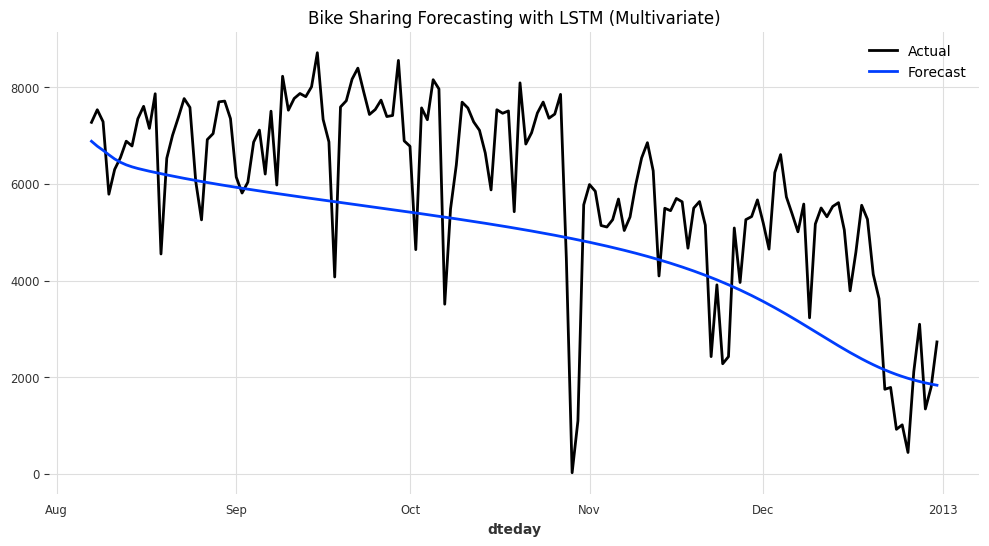

In [10]:
# 8. Prediksi ke depan sepanjang data test
forecast = model.predict(len(test))

# Balikkan ke skala asli
forecast = scaler.inverse_transform(forecast)
actual = scaler.inverse_transform(test)

# 9. Evaluasi kinerja model
error = mape(actual['cnt'], forecast['cnt'])
print(f"MAPE: {error:.2f}%")

# 10. Visualisasi hasil prediksi vs data asli
plt.figure(figsize=(12, 6))
actual['cnt'].plot(label="Actual")
forecast['cnt'].plot(label="Forecast")
plt.legend()
plt.title("Bike Sharing Forecasting with LSTM (Multivariate)")
plt.show()

* Forecast dibandingkan dengan data test.
* MAPE digunakan sebagai ukuran error.
* Hasil visualisasi memperlihatkan prediksi LSTM dibandingkan data asli.

# Optimasi Model Multivariate Time Series di Darts?

In [11]:
# 4. Definisikan parameter grid untuk LSTM
param_grid = {
    "input_chunk_length": [6, 12],   # seberapa panjang window input
    "hidden_dim": [20, 30],          # jumlah neuron di hidden layer
    "n_rnn_layers": [1, 2],          # jumlah layer LSTM
}
# 5. Definisikan model base
best_model, best_params, best_score = RNNModel.gridsearch(
    parameters=param_grid,
    series=train,
    val_series=test,       
    metric=smape,
    verbose=True
)

gridsearch:   0%|          | 0/8 [00:00<?, ?it/s]

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn             | RNN              | 520    | train
6 | V               | Linear           | 84     | train
-------------------------------------------------------------
604       Trainable params
0         Non-trainable params
604       Total params
0.002     Total estimated model params size (MB)
7         Modules in train mode
0         Modules in eval mode


Training: |                                                                                      | 0/? [00:00<…

`Trainer.fit` stopped: `max_epochs=100` reached.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting: |                                                                                    | 0/? [00:00<…

Generating TimeSeries:   0%|          | 0/1 [00:00<?, ?it/s]

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn             | RNN              | 1.4 K  | train
6 | V               | Linear           | 84     | train
-------------------------------------------------------------
1.4 K     Trainable params
0         Non-trainable params
1.4 K     Total params
0.006     Total estimated model params size (MB)
7         Modules in train mode
0         Modules in eval mode


Training: |                                                                                      | 0/? [00:00<…

`Trainer.fit` stopped: `max_epochs=100` reached.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting: |                                                                                    | 0/? [00:00<…

Generating TimeSeries:   0%|          | 0/1 [00:00<?, ?it/s]

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn             | RNN              | 1.1 K  | train
6 | V               | Linear           | 124    | train
-------------------------------------------------------------
1.2 K     Trainable params
0         Non-trainable params
1.2 K     Total params
0.005     Total estimated model params size (MB)
7         Modules in train mode
0         Modules in eval mode


Training: |                                                                                      | 0/? [00:00<…

`Trainer.fit` stopped: `max_epochs=100` reached.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting: |                                                                                    | 0/? [00:00<…

Generating TimeSeries:   0%|          | 0/1 [00:00<?, ?it/s]

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn             | RNN              | 2.9 K  | train
6 | V               | Linear           | 124    | train
-------------------------------------------------------------
3.1 K     Trainable params
0         Non-trainable params
3.1 K     Total params
0.012     Total estimated model params size (MB)
7         Modules in train mode
0         Modules in eval mode


Training: |                                                                                      | 0/? [00:00<…

`Trainer.fit` stopped: `max_epochs=100` reached.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting: |                                                                                    | 0/? [00:00<…

Generating TimeSeries:   0%|          | 0/1 [00:00<?, ?it/s]

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn             | RNN              | 520    | train
6 | V               | Linear           | 84     | train
-------------------------------------------------------------
604       Trainable params
0         Non-trainable params
604       Total params
0.002     Total estimated model params size (MB)
7         Modules in train mode
0         Modules in eval mode


Training: |                                                                                      | 0/? [00:00<…

`Trainer.fit` stopped: `max_epochs=100` reached.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting: |                                                                                    | 0/? [00:00<…

Generating TimeSeries:   0%|          | 0/1 [00:00<?, ?it/s]

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn             | RNN              | 1.4 K  | train
6 | V               | Linear           | 84     | train
-------------------------------------------------------------
1.4 K     Trainable params
0         Non-trainable params
1.4 K     Total params
0.006     Total estimated model params size (MB)
7         Modules in train mode
0         Modules in eval mode


Training: |                                                                                      | 0/? [00:00<…

`Trainer.fit` stopped: `max_epochs=100` reached.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting: |                                                                                    | 0/? [00:00<…

Generating TimeSeries:   0%|          | 0/1 [00:00<?, ?it/s]

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn             | RNN              | 1.1 K  | train
6 | V               | Linear           | 124    | train
-------------------------------------------------------------
1.2 K     Trainable params
0         Non-trainable params
1.2 K     Total params
0.005     Total estimated model params size (MB)
7         Modules in train mode
0         Modules in eval mode


Training: |                                                                                      | 0/? [00:00<…

`Trainer.fit` stopped: `max_epochs=100` reached.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting: |                                                                                    | 0/? [00:00<…

Generating TimeSeries:   0%|          | 0/1 [00:00<?, ?it/s]

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn             | RNN              | 2.9 K  | train
6 | V               | Linear           | 124    | train
-------------------------------------------------------------
3.1 K     Trainable params
0         Non-trainable params
3.1 K     Total params
0.012     Total estimated model params size (MB)
7         Modules in train mode
0         Modules in eval mode


Training: |                                                                                      | 0/? [00:00<…

`Trainer.fit` stopped: `max_epochs=100` reached.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting: |                                                                                    | 0/? [00:00<…

Generating TimeSeries:   0%|          | 0/1 [00:00<?, ?it/s]

In [12]:
# 7. Ambil model terbaik
print("Best parameters:", best_params)
print("Best Validation sMAPE:", best_score)

Best parameters: {'input_chunk_length': 12, 'hidden_dim': 30, 'n_rnn_layers': 1}
Best Validation sMAPE: 31.75189112041037


# Contoh implementasi Multiple Time Series di Darts

* https://unit8co.github.io/darts/examples/01-multi-time-series-and-covariates.html
* Data yang akan kita gunakan https://www.kaggle.com/datasets/marianadeem755/stock-market-data

# 📊 Multiple Time Series Forecasting: Tech Stocks Dataset

## 1. Deskripsi Dataset
Dataset ini berisi **harga saham harian** dari beberapa perusahaan teknologi terkenal seperti:
- Apple (AAPL)  
- Google (GOOG)  
- Microsoft (MSFT)  

Data mencakup kolom-kolom umum pada saham, seperti:
- `Date` → Tanggal transaksi  
- `Open` → Harga pembukaan  
- `Close` → Harga penutupan  
- `High` → Harga tertinggi  
- `Low` → Harga terendah  
- `Volume` → Jumlah saham yang diperdagangkan  

## 2. Karakteristik Permasalahan
Dataset ini merupakan contoh yang baik untuk mempelajari **multiple time series forecasting**, karena:  
- Terdapat **lebih dari satu deret waktu (time series)**, yaitu masing-masing harga saham dari perusahaan berbeda.  
- Semua time series menggunakan **indeks waktu yang sama (tanggal perdagangan)**, sehingga bisa dibandingkan atau dimodelkan bersama.  
- Jumlah data relatif kecil (**< 5000 baris**), sehingga mudah dipahami pemula dan tidak terlalu berat secara komputasi.  

## 3. Permasalahan yang Bisa Dikaji
Beberapa pertanyaan analisis yang bisa dijawab menggunakan dataset ini antara lain:
1. **Univariate Forecasting:**  
   Memprediksi harga penutupan (close price) saham Apple (AAPL) berdasarkan data historisnya sendiri.  

2. **Multivariate Forecasting:**  
   Menggunakan data beberapa variabel dalam satu saham (misalnya `Open`, `High`, `Low`, `Volume`) untuk memprediksi harga penutupan saham yang sama.  

3. **Multiple Time Series Forecasting:**  
   Menggunakan data harga saham dari beberapa perusahaan (AAPL, MSFT, GOOG) secara bersamaan untuk melatih model, dengan tujuan memprediksi harga saham salah satu perusahaan.  

## 4. Kelebihan 
- Memiliki **konteks nyata yang mudah dipahami** (fluktuasi harga saham perusahaan teknologi terkenal).  
- Bentuk tabel sederhana dengan **kolom waktu (`Date`) dan variabel numerik**.  
- Bisa digunakan untuk berbagai pendekatan: visualisasi tren, analisis korelasi antar saham, maupun forecasting dengan metode klasik (ARIMA) atau modern (LSTM, Prophet, Darts).

<center><img alt="" src="images/Stock-Price.jpg" style="height: 400px;"/></center> 

# Multiple Time Series Forecasting dengan Darts (N-BEATS) pada Data Saham Teknologi

Pada notebook ini, kita akan menggunakan dataset **Tech_stocks.csv** yang berisi data harga saham harian dari beberapa perusahaan teknologi besar: 
- Apple (AAPL)  
- Amazon (AMZN)  
- Google (GOOGL)  
- Microsoft (MSFT)  
- Nvidia (NVDA)  

Kolom yang tersedia meliputi harga **Open, High, Low, Close** dan **Volume**.  

Kita akan fokus pada harga **Close** untuk setiap saham, dan mencoba membangun model **multiple time series forecasting** menggunakan **N-BEATS** (Neural Basis Expansion Analysis Time Series).  


In [13]:
import pandas as pd
from darts import TimeSeries
from darts.models import NBEATSModel
from darts.dataprocessing.transformers import Scaler
from darts.utils.timeseries_generation import datetime_attribute_timeseries
from darts.metrics import mape

import matplotlib.pyplot as plt

## Penjelasan
- `pandas`: untuk membaca dan memproses data CSV.  
- `darts.TimeSeries`: struktur data utama di Darts untuk merepresentasikan time series.  
- `NBEATSModel`: model deep learning untuk forecasting.  
- `Scaler`: digunakan untuk normalisasi data (penting untuk model neural network).  
- `datetime_attribute_timeseries`: membantu menambahkan fitur berbasis waktu jika diperlukan (opsional).  
- `mape`: metrik evaluasi forecasting (Mean Absolute Percentage Error).  
- `matplotlib`: visualisasi hasil.  

In [14]:
# === 2. Load data ===
df = pd.read_csv("data/Tech_stocks.csv")

# Pastikan kolom Date dalam format datetime
df['Date'] = pd.to_datetime(df['Date'])

# Set index menjadi Date
df = df.set_index('Date')

df.head()

,Close_AAPL,Close_AMZN,Close_GOOGL,Close_MSFT,Close_NVDA,High_AAPL,High_AMZN,High_GOOGL,High_MSFT,High_NVDA,...,Open_AAPL,Open_AMZN,Open_GOOGL,Open_MSFT,Open_NVDA,Volume_AAPL,Volume_AMZN,Volume_GOOGL,Volume_MSFT,Volume_NVDA
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,6.440330,6.6950,15.609805,23.254051,0.423884,6.455075,6.8305,15.678546,23.366752,0.426864,...,6.422875,6.8125,15.614786,23.006108,0.424342,493729600,151998000,78169752,38409100,800204000
2010-01-05,6.451465,6.7345,15.541064,23.261557,0.430073,6.487878,6.7740,15.636953,23.366746,0.434658,...,6.458086,6.6715,15.620515,23.178910,0.422279,601904800,177038000,120067812,49749600,728648000
2010-01-06,6.348847,6.6125,15.149294,23.118809,0.432824,6.477046,6.7365,15.587638,23.351725,0.433741,...,6.451466,6.7300,15.587638,23.201455,0.429844,552160000,143576000,158988852,58182400,649168000
2010-01-07,6.337109,6.5000,14.796624,22.878376,0.424342,6.379842,6.6160,15.192630,23.066212,0.432366,...,6.372319,6.6005,15.177685,23.013616,0.430532,477131200,220604000,256315428,50559700,547792000
2010-01-08,6.379242,6.6760,14.993881,23.036165,0.425259,6.379844,6.6840,15.024515,23.201460,0.428239,...,6.328685,6.5280,14.744323,22.750656,0.420903,447610800,196610000,188783028,51197400,478168000


In [15]:
df.columns

Index(['Close_AAPL', 'Close_AMZN', 'Close_GOOGL', 'Close_MSFT', 'Close_NVDA',
       'High_AAPL', 'High_AMZN', 'High_GOOGL', 'High_MSFT', 'High_NVDA',
       'Low_AAPL', 'Low_AMZN', 'Low_GOOGL', 'Low_MSFT', 'Low_NVDA',
       'Open_AAPL', 'Open_AMZN', 'Open_GOOGL', 'Open_MSFT', 'Open_NVDA',
       'Volume_AAPL', 'Volume_AMZN', 'Volume_GOOGL', 'Volume_MSFT',
       'Volume_NVDA'],
      dtype='object')

In [16]:
print(df.isna().sum())

Close_AAPL      0
Close_AMZN      0
Close_GOOGL     0
Close_MSFT      0
Close_NVDA      0
High_AAPL       0
High_AMZN       0
High_GOOGL      0
High_MSFT       0
High_NVDA       0
Low_AAPL        0
Low_AMZN        0
Low_GOOGL       0
Low_MSFT        0
Low_NVDA        0
Open_AAPL       0
Open_AMZN       0
Open_GOOGL      0
Open_MSFT       0
Open_NVDA       0
Volume_AAPL     0
Volume_AMZN     0
Volume_GOOGL    0
Volume_MSFT     0
Volume_NVDA     0
dtype: int64


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3774 entries, 2010-01-04 to 2024-12-31
Data columns (total 25 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Close_AAPL    3774 non-null   float64
 1   Close_AMZN    3774 non-null   float64
 2   Close_GOOGL   3774 non-null   float64
 3   Close_MSFT    3774 non-null   float64
 4   Close_NVDA    3774 non-null   float64
 5   High_AAPL     3774 non-null   float64
 6   High_AMZN     3774 non-null   float64
 7   High_GOOGL    3774 non-null   float64
 8   High_MSFT     3774 non-null   float64
 9   High_NVDA     3774 non-null   float64
 10  Low_AAPL      3774 non-null   float64
 11  Low_AMZN      3774 non-null   float64
 12  Low_GOOGL     3774 non-null   float64
 13  Low_MSFT      3774 non-null   float64
 14  Low_NVDA      3774 non-null   float64
 15  Open_AAPL     3774 non-null   float64
 16  Open_AMZN     3774 non-null   float64
 17  Open_GOOGL    3774 non-null   float64
 18  Open_MSFT 

## Penjelasan
- Kita membaca dataset `Tech_stocks.csv`.  
- Kolom `Date` diubah menjadi format `datetime`.  
- `Date` dijadikan index agar sesuai dengan format time series di Darts.  


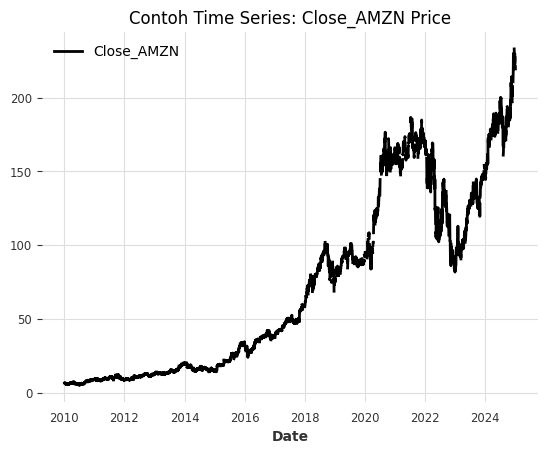

In [18]:
# === 3. Membuat multiple time series untuk beberapa saham (Close price) ===

# List kolom close yang ingin digunakan
close_cols = ["Close_AMZN", "Close_GOOGL", "Close_NVDA"]

# Konversi tiap kolom menjadi TimeSeries Darts
series_list = [TimeSeries.from_series(df[col], freq="D") for col in close_cols]

# Lihat contoh 1 series
series_list[0].plot()
plt.title("Contoh Time Series: {} Price".format(close_cols[0]))
plt.show()

## Penjelasan
- Kita fokus pada harga `Close` dari 5 saham.  
- `TimeSeries.from_series()` mengubah setiap kolom harga menjadi objek `TimeSeries` Darts.  
- Hasilnya adalah list berisi beberapa time series (`series_list`).  
- Kita plot salah satu (AAPL) sebagai contoh.  


In [19]:
# === 4. Split data menjadi train dan val untuk setiap series ===
N = 300
train_list = [s[:-N] for s in series_list]   # data latih (sebelum N hari terakhir)
val_list   = [s[-N:] for s in series_list]   # data validasi (N hari terakhir)
len(train_list), len(val_list)

(3, 3)

# <center><font color="red">Hati-hati!!!</font></center>

In [20]:
val_list

[<TimeSeries (Date: 300, component: 1, sample: 1)> Size: 2kB
 array([[[176.82000732]],
 
        [[175.3500061 ]],
 
        [[         nan]],
 
        [[         nan]],
 
        [[171.96000671]],
 
        [[175.38999939]],
 
        [[176.55999756]],
 
        [[178.75      ]],
 
        [[174.41999817]],
 
        [[         nan]],
 
 ...
 
        [[         nan]],
 
        [[225.05999756]],
 
        [[229.05000305]],
 
        [[         nan]],
 
        [[227.05000305]],
 
        [[223.75      ]],
 
        [[         nan]],
 
        [[         nan]],
 
        [[221.30000305]],
 
        [[219.38999939]]])
 Coordinates:
   * Date       (Date) datetime64[ns] 2kB 2024-03-07 2024-03-08 ... 2024-12-31
   * component  (component) object 8B 'Close_AMZN'
 Dimensions without coordinates: sample
 Attributes:
     static_covariates:  None
     hierarchy:          None
     metadata:           None,
 <TimeSeries (Date: 300, component: 1, sample: 1)> Size: 2kB
 array([[[133.74060059]]

In [21]:
from darts.utils.missing_values import fill_missing_values

for i, (list1, list2) in enumerate(zip(train_list, val_list)):
    train_list[i] = fill_missing_values(list1)
    val_list[i] = fill_missing_values(list2)
# Coba cek lagi
val_list

[<TimeSeries (Date: 300, component: 1, sample: 1)> Size: 2kB
 array([[[176.82000732]],
 
        [[175.3500061 ]],
 
        [[174.22000631]],
 
        [[173.09000651]],
 
        [[171.96000671]],
 
        [[175.38999939]],
 
        [[176.55999756]],
 
        [[178.75      ]],
 
        [[174.41999817]],
 
        [[174.43999736]],
 
 ...
 
        [[225.0133311 ]],
 
        [[225.05999756]],
 
        [[229.05000305]],
 
        [[228.05000305]],
 
        [[227.05000305]],
 
        [[223.75      ]],
 
        [[222.93333435]],
 
        [[222.1166687 ]],
 
        [[221.30000305]],
 
        [[219.38999939]]])
 Coordinates:
   * Date       (Date) datetime64[ns] 2kB 2024-03-07 2024-03-08 ... 2024-12-31
   * component  (component) object 8B 'Close_AMZN'
 Dimensions without coordinates: sample
 Attributes:
     static_covariates:  None
     hierarchy:          None
     metadata:           None,
 <TimeSeries (Date: 300, component: 1, sample: 1)> Size: 2kB
 array([[[133.74060059]]

## Penjelasan
- Kita memotong data menjadi **train** dan **validation**.  
- 100 data poin terakhir digunakan sebagai validasi (test set).  
- Hal ini dilakukan untuk semua saham (`series_list`).  

In [22]:
# === 5. Normalisasi data menggunakan Scaler ===
scaler = Scaler()
train_scaled = [scaler.fit_transform(s) for s in train_list]
val_scaled   = [scaler.transform(s) for s in val_list]

## Penjelasan
- Data saham memiliki skala berbeda (misalnya harga NVDA bisa jauh lebih tinggi daripada AAPL).  
- Oleh karena itu, kita gunakan **Scaler** untuk menormalkan data sebelum masuk ke model.  
- `fit_transform` dilakukan pada data train, lalu `transform` pada data validasi agar konsisten.  


In [34]:
# === 6. Definisikan dan latih model N-BEATS untuk multiple time series ===
import torch 

model = NBEATSModel(
    input_chunk_length=24,   # panjang input (X hari terakhir)
    output_chunk_length=12,   # prediksi Y hari ke depan
    n_epochs=10,             # jumlah epoch training, 
    batch_size=512,
    random_state=seed,
    force_reset=True,
    dropout=0.05,
    optimizer_kwargs={"lr":1e-4},  # learning rate lebih kecil agar stabil
    optimizer_cls=torch.optim.AdamW,
    pl_trainer_kwargs={
        "gradient_clip_val": 1.0,
        "accelerator": "auto" # Use GPU if available
    },
)

# Latih model pada multiple time series sekaligus
model.fit(train_scaled, verbose=True)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | stacks          | ModuleList       | 6.2 M  | train
-------------------------------------------------------------
6.2 M     Trainable params
1.4 K     Non-trainable params
6.2 M     Total params
24.787    Total estimated model params size (MB)
486       Modules in train mode
0         Modules in eval mode


Training: |                                                                                      | 0/? [00:00<…

`Trainer.fit` stopped: `max_epochs=10` reached.


NBEATSModel(output_chunk_shift=0, generic_architecture=True, num_stacks=30, num_blocks=1, num_layers=4, layer_widths=256, expansion_coefficient_dim=5, trend_polynomial_degree=2, dropout=0.05, activation=ReLU, input_chunk_length=24, output_chunk_length=12, n_epochs=10, batch_size=512, random_state=42, force_reset=True, optimizer_kwargs={'lr': 0.0001}, optimizer_cls=<class 'torch.optim.adamw.AdamW'>, pl_trainer_kwargs={'gradient_clip_val': 1.0, 'accelerator': 'auto'})

## Penjelasan
- `input_chunk_length=X`: model akan melihat X hari terakhir untuk membuat prediksi.  
- `output_chunk_length=Y`: model akan memprediksi Y hari ke depan.  
- `n_epochs=M`: jumlah epoch training. Gunakan GPU dan-atau pemrograman parallel untuk mempercepat proses ini.
- Kita melatih model dengan **daftar time series** (`train_scaled`), bukan hanya satu series.  
- Dengan cara ini, model dapat belajar **pola bersama** antar berbagai saham.  


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting: |                                                                                    | 0/? [00:00<…

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting: |                                                                                    | 0/? [00:00<…

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting: |                                                                                    | 0/? [00:00<…

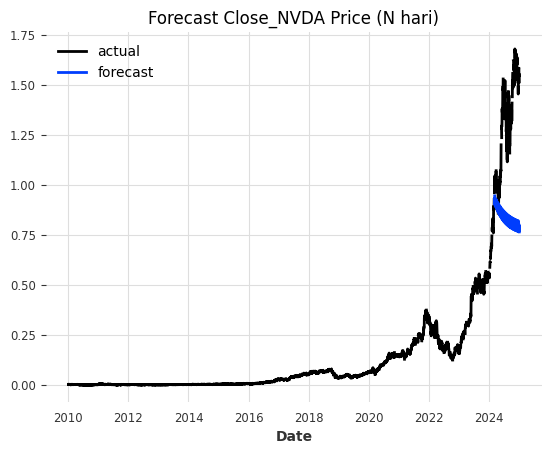

In [38]:
# === 7. Forecasting pada data validasi ===
forecast_list = [model.predict(n=300, series=s) for s in train_scaled]

# Plot hasil untuk satu contoh (misalnya AAPL)
scaler.transform(series_list[-1]).plot(label="actual")
forecast_list[0].plot(label="forecast")
plt.title("Forecast {} Price (N hari)".format(close_cols[-1]))
plt.legend()
plt.show()

## Penjelasan
- `model.predict(n=100, series=s)`: menghasilkan prediksi sepanjang 200 hari ke depan, untuk setiap saham.  
- Kita mem-plot hasil aktual vs prediksi untuk saham AAPL.  


In [37]:
# === 8. Evaluasi dengan MAPE (Mean Absolute Percentage Error) ===
for i, (val, forecast) in enumerate(zip(val_scaled, forecast_list)):
    error = mape(val, forecast)
    print(f"MAPE untuk {close_cols[i]}: {error:.2f}%")

MAPE untuk Close_AMZN: 60.73%
MAPE untuk Close_GOOGL: 56.60%
MAPE untuk Close_NVDA: 35.17%


## Penjelasan
- Kita menghitung **MAPE** untuk tiap saham antara data validasi (`val_scaled`) dan prediksi (`forecast_list`).  
- Semakin kecil nilai MAPE, semakin baik model dalam memprediksi.  


# Latihan Mandiri

* Coba Latihan Untuk membuat Model Optimal Model Multiple TimeSeries ini
* Gunakan Early Stopping: https://unit8co.github.io/darts/generated_api/darts.models.forecasting.tide_model.html
* 

# <center><font color="red">Babak Penyisihan PeDaS 2025 ... Dimulai!!!...</font></center>

<center><img alt="" src="images/Poster-babak-Penyisihan-pedas-2025.png" style="height: 400px;"/></center> 